# Notebook 2: Exploratory Data Analysis & Feature Selection

## Objectives

* Explore the heart disease dataset to identify patterns and relationships between features and the target variable.
* Determine the top features to feed into machine learning models.

## Inputs
* `outputs/datasets/collection/heart_disease_raw.csv` (from Notebook 1)

## Outputs
* Insights and visualizations to guide feature selection.
* List of top candidate variables for modeling.
* Optional figures saved to `outputs/figures`.

### OPTIONAL: Automated Profiling Report
Uncomment to run this for a quick, minimal summary of the dataset.

from ydata_profiling import ProfileReport
import pandas as pd
data_path = "outputs/datasets/collection/heart_disease_raw.csv"
df = pd.read_csv(data_path)
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

---

Load raw dataset as way to verify that we are loading the correct dataset

In [13]:
import pandas as pd
df = pd.read_csv("/workspaces/Heart_disease_risk_predictor/inputs/datasets/raw/heart_disease_uci.csv")

# Show first 5 rows
print("Dataset loaded successfully! First 5 rows of dataset:")
display(df.head())

Dataset loaded successfully! First 5 rows of dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Target Variable Distribution for "num" indicating stage of the heart disease

/tmp/ipykernel_11102/3680591501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="num", palette="Set2")


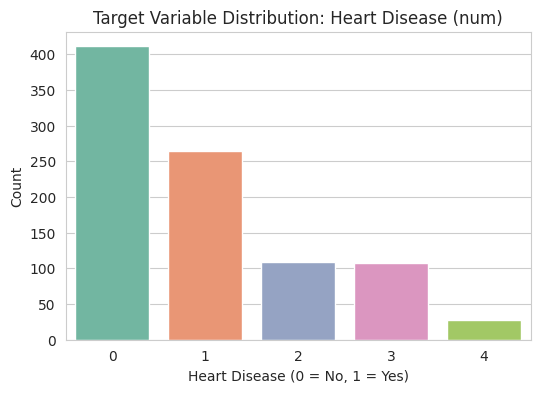

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="num", palette="Set2")
plt.title("Target Variable Distribution: Heart Disease (num)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Numerical Features Distribution

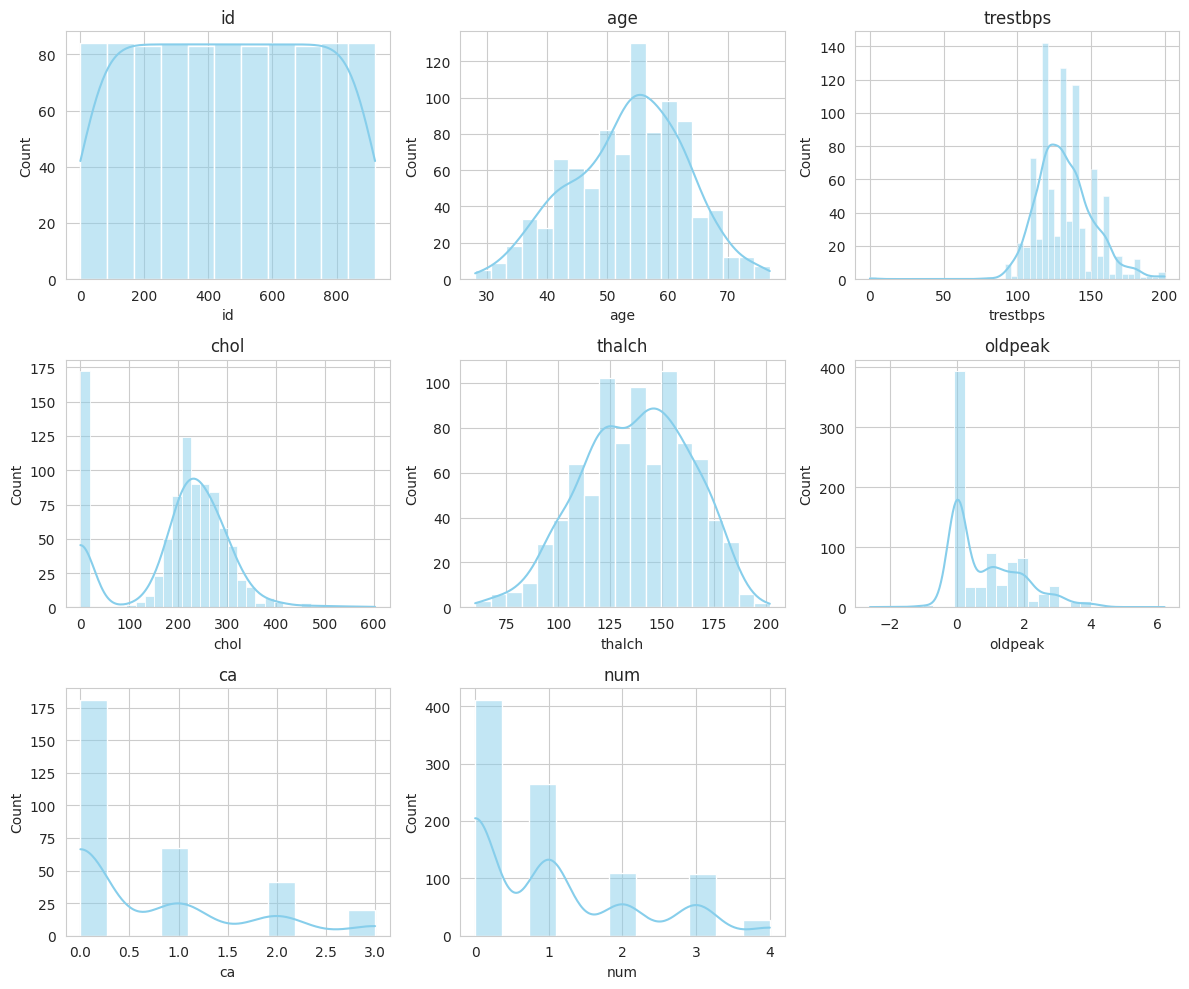

In [20]:
numerical_vars = df.select_dtypes(include='number').columns.tolist()
# numerical_vars.remove('num')  # Exclude target

plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

Categorical Features Distribution

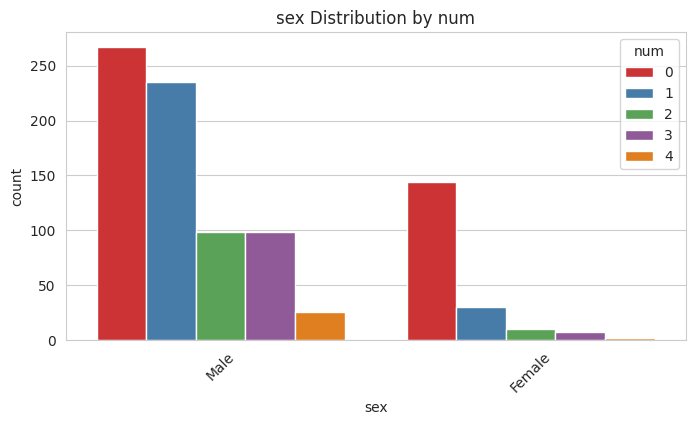

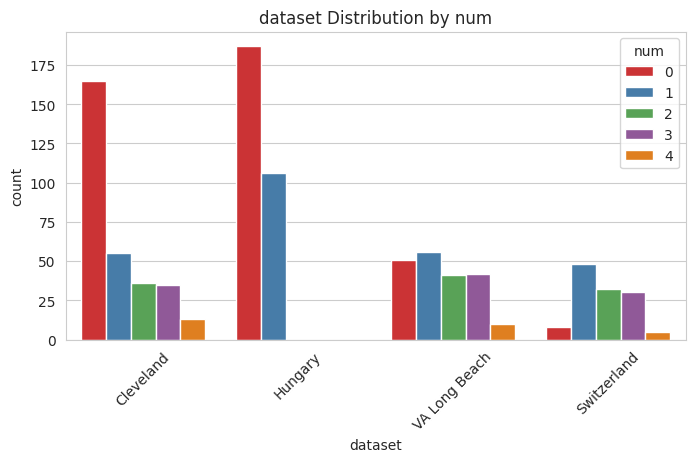

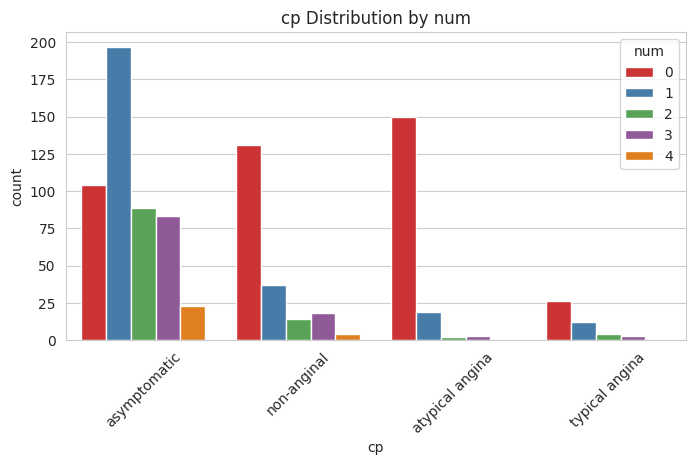

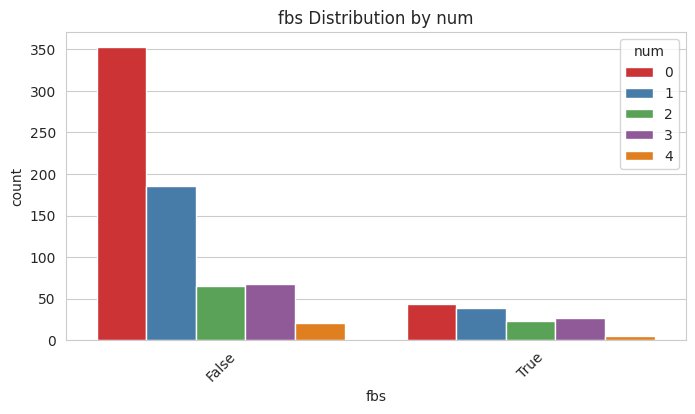

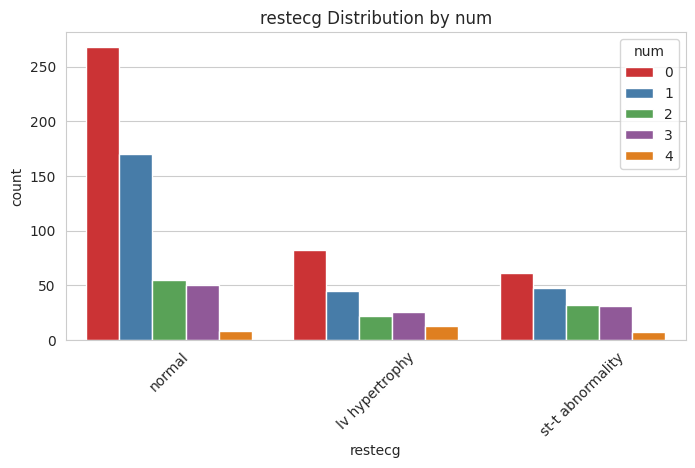

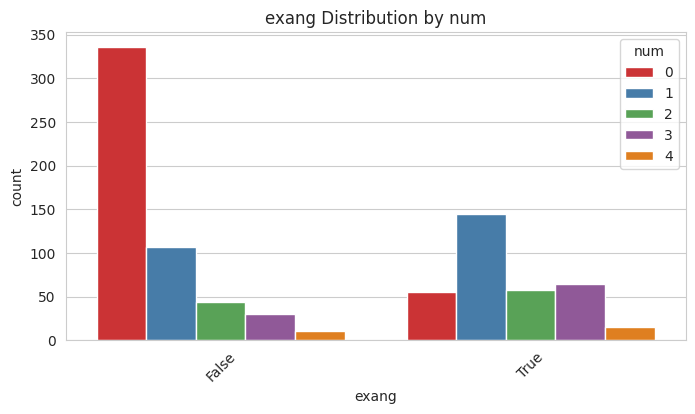

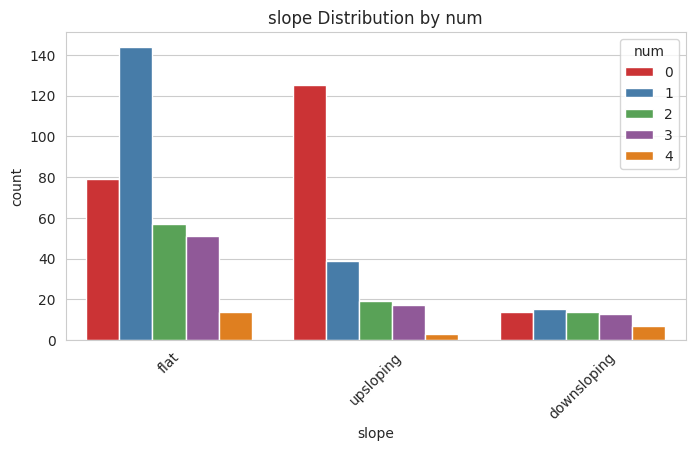

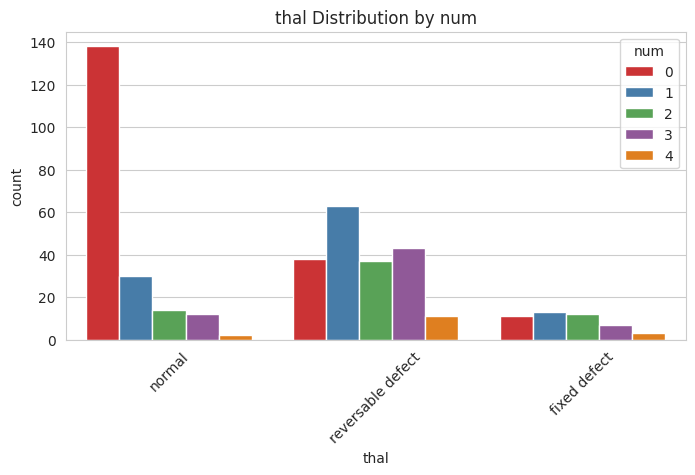

In [26]:
categorical_vars = df.select_dtypes(include='object').columns.tolist()

def plot_categorical(df, col, target="num"):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=target, palette="Set1", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution by {target}")
    plt.show()

for col in categorical_vars:
    plot_categorical(df, col)


Correlation Analysis

Spearman correlation

In [28]:
numeric_cols = df.select_dtypes(include='number')
corr_spearman = numeric_cols.corr(method='spearman')['num'].sort_values(key=abs, ascending=False)[1:]
print(corr_spearman)

print("Top correlations with target (Spearman):")
display(corr_spearman.head(10))

ca          0.528047
oldpeak     0.434273
thalch     -0.398360
age         0.347184
id          0.325659
chol       -0.157563
trestbps    0.126805
Name: num, dtype: float64
Top correlations with target (Spearman):


ca          0.528047
oldpeak     0.434273
thalch     -0.398360
age         0.347184
id          0.325659
chol       -0.157563
trestbps    0.126805
Name: num, dtype: float64